In [84]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


In [85]:
#Fetch Car Prices Csv data 
car_data=pd.read_csv(r'car-pricing-data.csv')

In [86]:
#Check out the dataset attributes such as head, description, info, # of missing rows, and correlation
#Read the first 5 rows
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [87]:
#Check out the dataset attributes such as head, description, info, # of missing rows, and correlation
#Print the number of rows and columns 
car_data.shape

(8128, 12)

In [88]:
#Observe the features of our dataset
car_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [89]:
#Check out the dataset attributes such as head, description, info, # of missing rows, and correlation
#Number of missing rows
car_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [90]:
#Since we have missing values, we need to clean them
car_data.dropna(inplace=True)

In [91]:
#Check again the missing rows
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [92]:
#Check out the dataset attributes such as head, description, info, # of missing rows, and correlation
#Information about dataset -Before Feature Eng
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   owner          7907 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7907 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 803.1+ KB


In [93]:
#Check out the dataset attributes such as head, description, info, # of missing rows, and correlation
#Descriptive statistical analysis -Before Feature Eng
car_data.describe()

,year,selling_price,km_driven,seats
count,7907.000000,7.907000e+03,7.907000e+03,7907.000000
mean,2013.982168,6.497417e+05,6.919256e+04,5.416719
std,3.866650,8.135565e+05,5.678976e+04,0.959588
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.575000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [94]:
#Check out the dataset attributes such as head, description, info, # of missing rows, and correlation
#Correlation of the data -Before Feature Eng 
car_data.corr()

,year,selling_price,km_driven,seats
year,1.000000,0.412268,-0.428434,-0.009144
selling_price,0.412268,1.000000,-0.222196,0.041358
km_driven,-0.428434,-0.222196,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


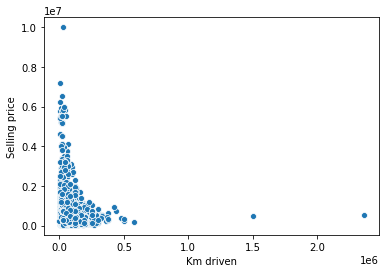

In [95]:
#Plotting dependent features with respect to selling price - km_driven
plt_km = sns.scatterplot(x = 'km_driven', y = 'selling_price', data = car_data)
plt_km.set_xlabel('Km driven')
plt_km.set_ylabel('Selling price')
plt.show()

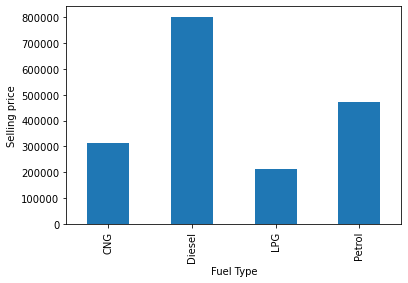

In [96]:
#Plotting dependent features with respect to selling price - Fuel type
df_avg_price_fuel = car_data[['fuel','selling_price']].groupby("fuel", as_index = False).mean().rename(columns={'selling_price':'avg_price_fuel'})
plt_fuel = df_avg_price_fuel.plot(x = 'fuel', kind='bar', sort_columns = True,legend = False,)
plt_fuel.set_xlabel("Fuel Type")
plt_fuel.set_ylabel("Selling price")
plt.show()

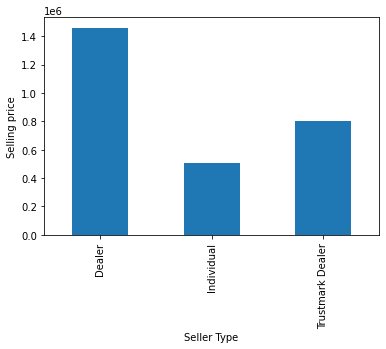

In [97]:
#Plotting dependent features with respect to selling price - Seller type
df_avg_price_seller = car_data[['seller_type','selling_price']].groupby("seller_type", as_index = False).mean().rename(columns={'selling_price':'avg_price_seller'})
plt1 = df_avg_price_seller.plot(x = 'seller_type', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Seller Type")
plt1.set_ylabel("Selling price")
plt.show()

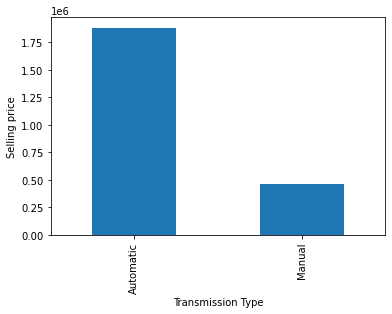

In [98]:
#Plotting dependent variables with respect to price - Transmission type
df_avg_price_transmission = car_data[['transmission','selling_price']].groupby("transmission", as_index = False).mean().rename(columns={'selling_price':'avg_price_transmission'})
plt_trans = df_avg_price_transmission.plot(x = 'transmission', kind='bar', sort_columns = True,legend = False,)
plt_trans.set_xlabel("Transmission Type")
plt_trans.set_ylabel("Selling price")
plt.show()

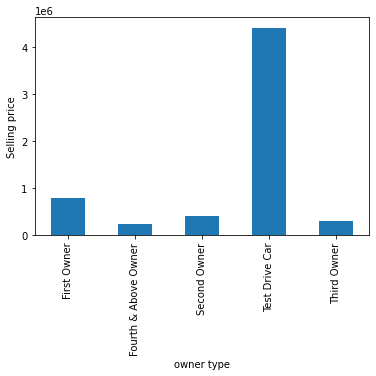

In [99]:
#Plotting dependent variables with respect to price - Owner type
df_avg_price_owner = car_data[['owner','selling_price']].groupby("owner", as_index = False).mean().rename(columns={'selling_price':'avg_price_owner'})
plt_owner = df_avg_price_owner.plot(x = 'owner', kind='bar', sort_columns = True,legend = False,)
plt_owner.set_xlabel("owner type")
plt_owner.set_ylabel("Selling price")
plt.show()

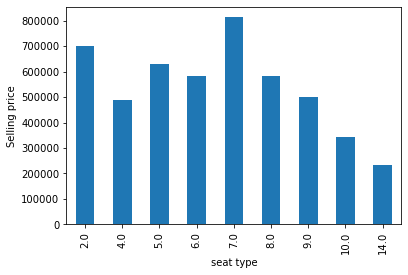

In [100]:
#Plotting dependent variables with respect to price - Seat type
df_avg_price_seat = car_data[['seats','selling_price']].groupby("seats", as_index = False).mean().rename(columns={'selling_price':'avg_price_seat'})
plt_seat = df_avg_price_seat.plot(x = 'seats', kind='bar', sort_columns = True,legend = False,)
plt_seat.set_xlabel("seat type")
plt_seat.set_ylabel("Selling price")
plt.show()

In [101]:
#Remove unit names from the numerical values -Feature Eng
car_data['mileage'] = car_data['mileage'].map(lambda x: float(str(x).rstrip('kmpl')) if 'kmpl' in str(x) else float(str(x).rstrip('km/kg')))
car_data['engine'] = car_data['engine'].map(lambda x: int(str(x).rstrip('CC')))
car_data['max_power'] = car_data['max_power'].map(lambda x: float(str(x).rstrip(' bhp') if '.' in str(x) else float(str(x).rstrip(' bhp')+".0")))

In [102]:
#Convert year to age -Feature Eng
car_data['year'] = car_data['year'].map(lambda x: 2020-x)
car_data = car_data.rename(columns = {'year': 'age'})

In [103]:
#Create one-hot dummy format -Feature Eng
car_data = pd.get_dummies(car_data, columns =['fuel', 'seller_type', 'transmission', 'owner'])

In [104]:
#Concatenate the dataset with one-hot dummy columns and drop the old columns
car_data.head()

,name,age,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,6,450000,145500,23.40,1248,74.00,5.0,0,1,...,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,6,370000,120000,21.14,1498,103.52,5.0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,14,158000,140000,17.70,1497,78.00,5.0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,10,225000,127000,23.00,1396,90.00,5.0,0,1,...,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,13,130000,120000,16.10,1298,88.20,5.0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [105]:
#Check out the dataset attributes such as head, description, info, # of missing rows, and correlation
#Information about dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          7907 non-null   object 
 1   age                           7907 non-null   int64  
 2   selling_price                 7907 non-null   int64  
 3   km_driven                     7907 non-null   int64  
 4   mileage                       7907 non-null   float64
 5   engine                        7907 non-null   int64  
 6   max_power                     7907 non-null   float64
 7   seats                         7907 non-null   float64
 8   fuel_CNG                      7907 non-null   uint8  
 9   fuel_Diesel                   7907 non-null   uint8  
 10  fuel_LPG                      7907 non-null   uint8  
 11  fuel_Petrol                   7907 non-null   uint8  
 12  seller_type_Dealer            7907 non-null   uint8  
 13  sel

In [106]:
#Check out the dataset attributes such as head, description, info, # of missing rows, and correlation
#Descriptive statistical analysis
car_data.describe()

,age,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,7907.000000,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,...,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.00000,7907.000000,7907.000000
mean,6.017832,6.497417e+05,6.919256e+04,19.418783,1458.625016,91.575790,5.416719,0.006703,0.543695,0.004426,...,0.140003,0.830150,0.029847,0.131655,0.868345,0.659542,0.020235,0.25509,0.000632,0.064500
std,3.866650,8.135565e+05,5.678976e+04,4.037145,503.916303,35.759792,0.959588,0.081602,0.498119,0.066388,...,0.347012,0.375524,0.170176,0.338137,0.338137,0.473893,0.140813,0.43594,0.025140,0.245657
min,0.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,5.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
75%,8.000000,6.900000e+05,9.575000e+04,22.320000,1582.000000,102.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000
max,26.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


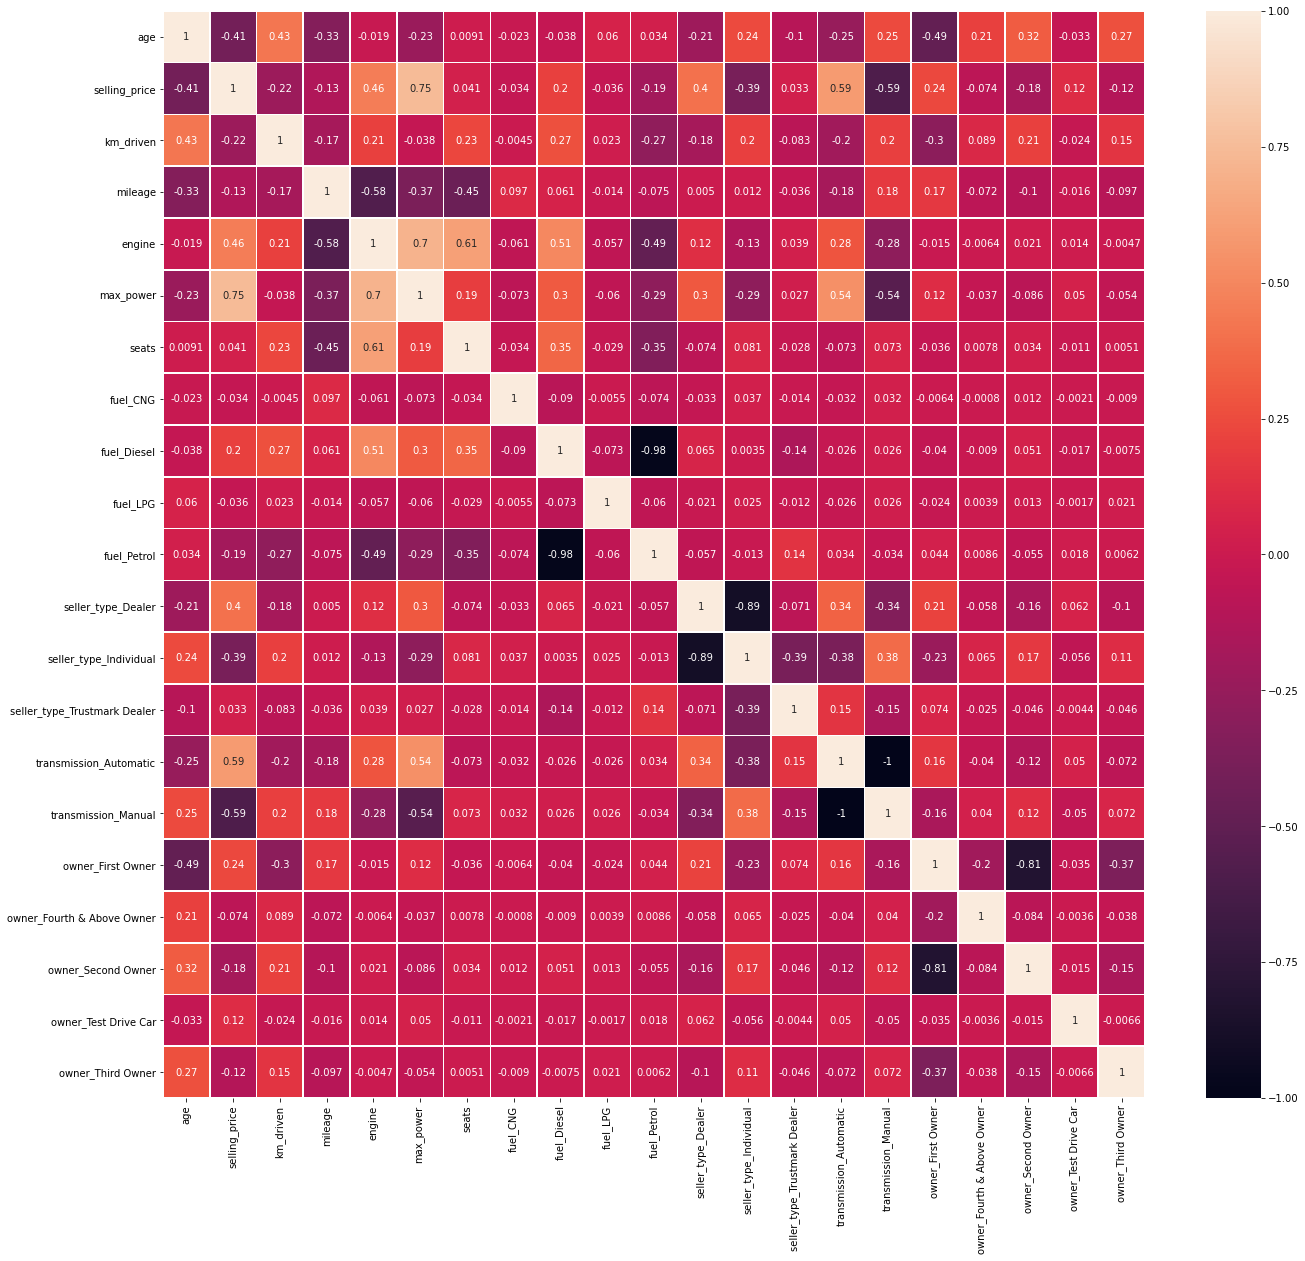

In [107]:
#Check out the dataset attributes such as head, description, info, # of missing rows, and correlation
#Correlation of the data
fig, ax = plt.subplots(figsize=(22,20))         
sns.heatmap(car_data.corr(method='pearson'), annot=True, linewidths= .6, ax=ax)

In [108]:
#Drop the least correlated data -Feature Selection & Create different feature sets including at least 4 different features in 3 different settings 
car_data.drop(['seats', 'fuel_CNG', 'fuel_LPG', 'seller_type_Trustmark Dealer', 'owner_Fourth & Above Owner'], axis=1, inplace=True)
featureset1 = car_data[['selling_price', 'mileage', 'age', 'engine', 'max_power']]
featureset2 = car_data[['selling_price', 'fuel_Diesel', 'fuel_Petrol', 'transmission_Automatic', 'transmission_Manual']]
featureset3 = car_data[['selling_price', 'seller_type_Dealer', 'seller_type_Individual', 'owner_First Owner', 'owner_Second Owner', 'owner_Third Owner']]

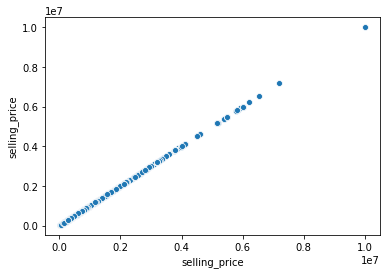

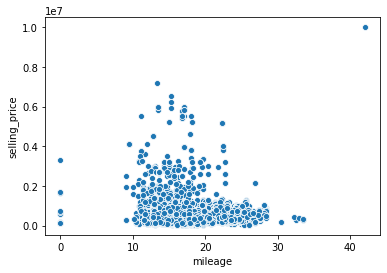

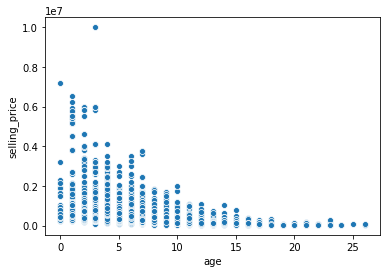

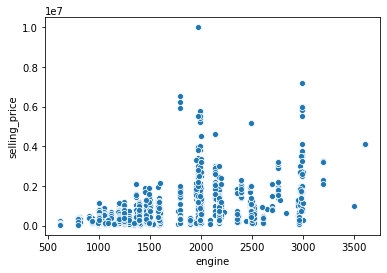

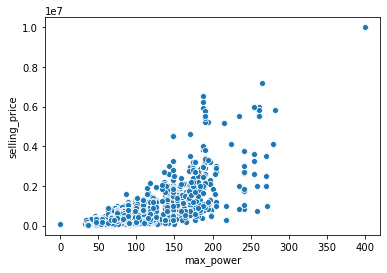

In [109]:
#Visualize the data for each dependent feature with independent feature - for feature Set 1

for k, col in enumerate (featureset1.columns):
    plt.figure(k)
    sns.scatterplot(x=featureset1[col],y=featureset1['selling_price'])

In [110]:
# Split the data to independent variables & dependent variable for feature Set 1
x1 = featureset1.iloc[:,1:].values
y1 = featureset1.iloc[:,0].values

In [111]:
# Split the data to training and test sets for feature Set 1
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=147)

In [112]:
# Initialize min-max scaler and transform each feature by using min-max scaler
# You need to put the feature values to a certain range (in general: (0, 1)) in order to stabilize the model
scaler = MinMaxScaler(feature_range=(0, 1))
x1_train = scaler.fit_transform(x1_train)
x1_train

array([[0.39404762, 0.26923077, 0.62885906, 0.19662309],
       [0.63309524, 0.26923077, 0.20939597, 0.11220044],
       [0.39952381, 0.11538462, 0.29261745, 0.15231481],
       ...,
       [0.36190476, 0.46153846, 0.1909396 , 0.08769063],
       [0.47571429, 0.19230769, 0.28087248, 0.20615468],
       [0.36595238, 0.34615385, 0.19194631, 0.10947712]])

In [113]:
# Initialize the linear regression model for feature Set 1
model = LinearRegression()

In [114]:
# Fit the training data to the model
model.fit(x1_train, y1_train)
model.coef_

array([  524874.39433655, -1194232.41382416,  -210586.85394589,
        6287030.2146631 ])

In [115]:
# Print the general formula of our linear regression model

def printformula():
    _str = "y = "
    for i, m in enumerate(model.coef_):
        _str += "x_{}*{}+".format(i+1, m)
    _str += str(model.intercept_)
    print(_str)
    
printformula()

y = x_1*524874.3943365469+x_2*-1194232.4138241631+x_3*-210586.85394589265+x_4*6287030.214663101+-264052.9838406632


In [116]:
# Scale each feature to range(0, 1)
x1_test = scaler.transform(x1_test)
x1_test

array([[0.3047619 , 0.34615385, 0.62751678, 0.18845316],
       [0.36428571, 0.57692308, 0.24060403, 0.13671024],
       [0.54761905, 0.38461538, 0.2590604 , 0.15577342],
       ...,
       [0.4       , 0.07692308, 0.45637584, 0.31917211],
       [0.67619048, 0.26923077, 0.20939597, 0.11220044],
       [0.53142857, 0.34615385, 0.32147651, 0.2546841 ]])

In [117]:
# Predict the values by using all test data
y1_pred = model.predict(x1_test)

In [118]:
# Print the predicted and the actual value of the first row in test set
"Predicted: {}, Actual: {}".format(y1_pred[1], y1_test[1])

'Predicted: 47004.3833479489, Actual: 65000'

In [119]:
# Calculate the score of the model in test data
score = model.score(x1_test, y1_test)
print(score)

0.6195625010545437


In [120]:
# Calculate mean squared error of predicted values
mse = mean_squared_error(y1_test, y1_pred)
print(mse)

241356181789.76587


In [121]:
# Calculate absolute squared error of predicted values
mae = mean_absolute_error(y1_test, y1_pred)
print(mae)

285668.833121352


In [122]:
# Calculate r2 Score of predicted values
r2 = r2_score(y1_test, y1_pred)
print(r2)

0.6195625010545437


In [123]:
# Calculate root-mean squared error of predicted values
rmse = sqrt(mean_squared_error(y1_test, y1_pred))
print(rmse)

491280.14593484835


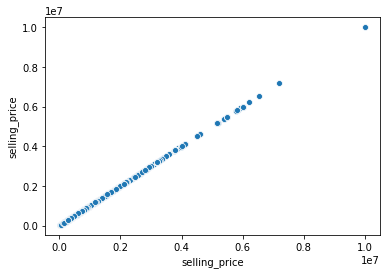

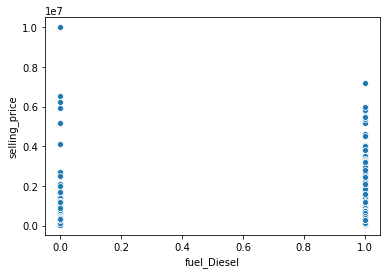

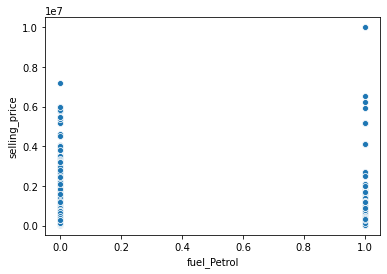

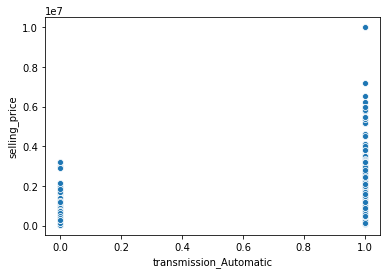

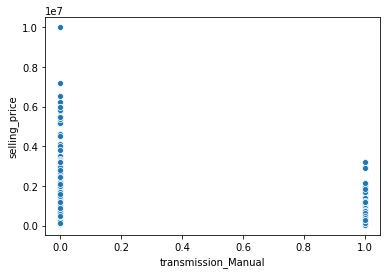

In [124]:
#Visualize the data for each dependent feature with independent feature - for featureset 2

for k, col in enumerate (featureset2.columns):
    plt.figure(k)
    sns.scatterplot(x=featureset2[col],y=featureset2['selling_price'])

In [125]:
# Split the data to independent variables & dependent variable for feature Set 2
x2 = featureset2.iloc[:,1:].values
y2 = featureset2.iloc[:,0].values

In [126]:
# Split the data to training and test sets for feature Set 2
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=147)

In [127]:
# Initialize min-max scaler and transform each feature by using min-max scaler
# You need to put the feature values to a certain range (in general: (0, 1)) in order to stabilize the model
scaler = MinMaxScaler(feature_range=(0, 1))
x2_train = scaler.fit_transform(x2_train)
x2_train

array([[1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.]])

In [128]:
# Initialize the linear regression model for feature Set 2
model2 = LinearRegression()

In [129]:
# Fit the training data to the model
model2.fit(x2_train, y2_train)
model2.coef_

array([ 354782.3352819 ,   -8155.12973282,  710444.77529633,
       -710444.77529633])

In [130]:
# Print the general formula of our linear regression model
def printformula():
    _str = "y = "
    for i, m in enumerate(model2.coef_):
        _str += "x_{}*{}+".format(i+1, m)
    _str += str(model2.intercept_)
    print(_str)
    
printformula()

y = x_1*354782.3352819026+x_2*-8155.129732818255+x_3*710444.7752963266+x_4*-710444.7752963266+983650.6282375036


In [131]:
# Scale each feature to range(0, 1)
x2_test = scaler.transform(x2_test)
x2_test

array([[1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [1., 0., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.]])

In [132]:
# Predict the values by using all test data
y2_pred = model2.predict(x2_test)

In [133]:
# Print the predicted and the actual value of the first row in test set
"Predicted: {}, Actual: {}".format(y2_pred[1], y2_test[1])

'Predicted: 265050.72320835874, Actual: 65000'

In [134]:
# Calculate the score of the model in test data
score2 = model2.score(x2_test, y2_test)
print(score2)

0.44052588737254017


In [135]:
# Calculate mean squared error of predicted values
mse2 = mean_squared_error(y2_test, y2_pred)
print(mse2)

354940130792.2616


In [136]:
# Calculate absolute squared error of predicted values
mae2 = mean_absolute_error(y2_test, y2_pred)
print(mae2)

343987.0867852175


In [137]:
# Calculate r2 Score of predicted values
r2_2 = r2_score(y2_test, y2_pred)
print(r2_2)

0.44052588737254017


In [138]:
# Calculate root-mean squared error of predicted values
rmse2 = sqrt(mean_squared_error(y2_test, y2_pred))
print(rmse2)

595768.5211491637


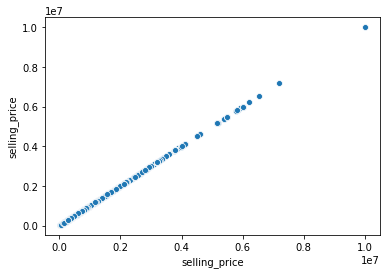

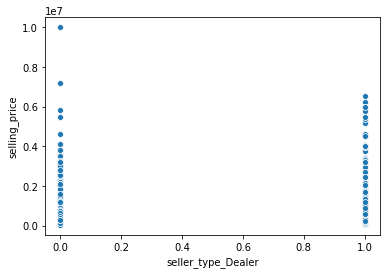

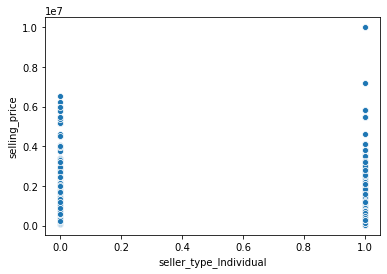

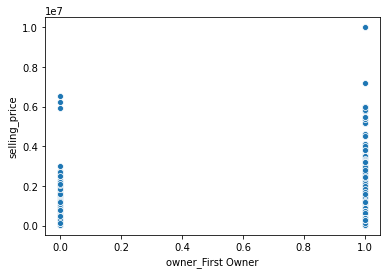

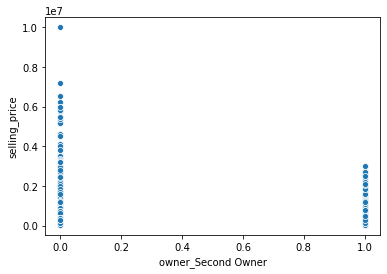

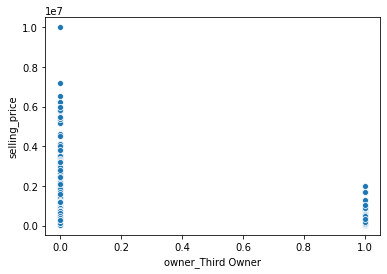

In [139]:
#Visualize the data for each dependent feature with independent feature - for featureset 3

for k, col in enumerate (featureset3.columns):
    plt.figure(k)
    sns.scatterplot(x=featureset3[col],y=featureset3['selling_price'])

In [140]:
# Split the data to independent variables & dependent variable for feature Set 3
x3 = featureset3.iloc[:,1:].values
y3 = featureset3.iloc[:,0].values

In [141]:
# Split the data to training and test sets for feature Set 3
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=147)

In [142]:
# Initialize min-max scaler and transform each feature by using min-max scaler
# You need to put the feature values to a certain range (in general: (0, 1)) in order to stabilize the model
scaler = MinMaxScaler(feature_range=(0, 1))
x3_train = scaler.fit_transform(x3_train)
x3_train

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [143]:
# Initialize the linear regression model for feature Set 3
model3 = LinearRegression()

In [144]:
# Fit the training data to the model
model3.fit(x3_train, y3_train)
model3.coef_

array([ 6.62767814e+05, -1.99531909e+05,  2.58155481e+05, -5.01514263e+02,
       -6.18346226e+04])

In [145]:
# Print the general formula of our linear regression model
def printformula():
    _str = "y = "
    for i, m in enumerate(model3.coef_):
        _str += "x_{}*{}+".format(i+1, m)
    _str += str(model3.intercept_)
    print(_str)
    
printformula()

y = x_1*662767.8138870833+x_2*-199531.90923109456+x_3*258155.48051126266+x_4*-501.51426258083825+x_5*-61834.622590167186+553257.0572036825


In [146]:
# Scale each feature to range(0, 1)
x3_test = scaler.transform(x3_test)
x3_test

array([[1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       ...,
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0.]])

In [147]:
# Predict the values by using all test data
y3_pred = model3.predict(x3_test)

In [148]:
# Print the predicted and the actual value of the first row in test set
"Predicted: {}, Actual: {}".format(y3_pred[1], y3_test[1])

'Predicted: 611880.6284838506, Actual: 65000'

In [149]:
# Calculate the score of the model in test data
score3 = model3.score(x3_test, y3_test)
print(score3)

0.1943632221487388


In [150]:
# Calculate mean squared error of predicted values
mse3 = mean_squared_error(y3_test, y3_pred)
print(mse3)

511110017152.82556


In [151]:
# Calculate absolute squared error of predicted values
mae3 = mean_absolute_error(y3_test, y3_pred)
print(mae3)

393396.4862376717


In [152]:
# Calculate r2 Score of predicted values
r2_3 = r2_score(y3_test, y3_pred)
print(r2_3)

0.1943632221487388


In [153]:
# Calculate root-mean squared error of predicted values
rmse3 = sqrt(mean_squared_error(y3_test, y3_pred))
print(rmse3)

714919.5878928102


In [154]:
# Visualize the results for 3 different feature sets in a table
data = {'mse':[mse, mse2, mse3],'mae':[mae, mae2, mae3], 'r2score':[score, score2, score3], 'rmse':[rmse, rmse2, rmse3] }
results = pd.DataFrame(data, index=['featureset1','featureset2','featureset3'])
results.head()

,mse,mae,r2score,rmse
featureset1,2.413562e+11,285668.833121,0.619563,491280.145935
featureset2,3.549401e+11,343987.086785,0.440526,595768.521149
featureset3,5.111100e+11,393396.486238,0.194363,714919.587893
